<a href="https://colab.research.google.com/github/gauravgarwal9011/Application/blob/main/Multimodal_RAG_with_llamaindex_and_LanceDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal RAG App for video processing with LlamaIndex and LanceDB

In [ ]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai
%pip install llama-index-embeddings-clip
%pip install git+https://github.com/openai/CLIP.git
!pip install llama-index-readers-file

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.7/808.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.2/129.2 kB 6.2 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ehjru3hu
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ehjru3hu
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%pip install llama_index
%pip install -U openai-whisper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.1/253.1 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: llama-index-multi-modal-llms-openai
    Found existing installation: llama-index-multi-modal-llms-openai 0.5.0
    Uninstalling llama-index-multi-modal-llms-openai-0.5.0:
      Successfully uninstalled llama-index-multi-modal-llms-openai-0.5.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 13.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803406 sha256=4ec34e119e7052c4960b5bae23b60f9229f3873672918c9a3741f0522bfd7d4b
  Stored in directory: /root/.cache/pip/wheels/2f/f2/ce/6eb23db4091d026238ce76703bd66da60b969d70bcc81d5d3a
Successfully built openai-whisper


In [ ]:
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 60.2 MB/s eta 0:00:00




ffmpeg-library enables you to use FFmpeg in Python to manipulate various media files for different purposes like building comprehensive multimedia applications, preprocessing media files.

MoviePy is a Python library for video editing, enabling cutting, concatenations, title insertions, video compositing, and effects like animations or color grading.

Pytube is a Python library used for downloading videos from YouTube. It supports downloading in various formats, resolutions, and also direct audio extraction.

Pydub is a Python library for audio manipulation, enabling easy loading, editing, and exporting of audio files in various formats with minimal code.

The SpeechRecognition library in Python allows you to convert spoken language into text using various engines and APIs, such as Google Speech Recognition, IBM Speech to Text, etc.

SoundFile is a Python library for reading from and writing to audio files, supporting many formats through the libsndfile library, ideal for high-quality audio processing.

FTFY (Fix Text For You) is a Python library that fixes broken Unicode text and mojibake (garbled text due to encoding issues), making text legible again.

OpenAI Whisper is a robust, multilingual speech recognition model developed by OpenAI. It converts speech into text and supports various languages with high accuracy.

pprint is a Python module that provides a capability to "pretty-print" complex data structures in a well-formatted and more readable way than the basic print function.


In [ ]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

  if event.key is 'enter':



In [ ]:
import os
from google.colab import userdata
OPEN_API_TOKEN = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = OPEN_API_TOKEN

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
video_url="https://youtu.be/3dhcmeOTZ_Q"

In [ ]:
output_video_path = "/content/video_data/"

In [ ]:
# from video we will collect images, audio, text
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [ ]:
!mkdir mixed_data

In [ ]:
filepath = output_video_path + "input_vid.mp4.webm"
print(filepath)

/content/video_data/input_vid.mp4.webm


In [ ]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}

  yt.streams.get_highest_resolution().download(
      output_path=output_path, filename="input_vid.mp4"
  )
  return metadata

In [ ]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_folder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder, "frame%04d.png"),fps=0.2
  )

In [ ]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)

In [ ]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:
      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)
    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text

In [ ]:
video_url="https://www.youtube.com/watch?v=FwOTs4UxQS4"

In [ ]:
output_video_path

'/content/video_data/'

In [ ]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 65.8 MB/s eta 0:00:00


In [ ]:
import yt_dlp

def download_video(url, output_path):
    ydl_opts = {
        'outtmpl': output_path + '/input_vid.mp4',  # Path where to save
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        result = ydl.extract_info(url, download=True)

    metadata = {
        "Author": result.get("uploader", "Unknown"),
        "Title": result.get("title", "Unknown Title"),
        "Views": result.get("view_count", "Unknown Views"),
    }

    return metadata

In [ ]:
metadata_vid=download_video(video_url,output_video_path)

[youtube] Extracting URL: https://www.youtube.com/watch?v=FwOTs4UxQS4
[youtube] FwOTs4UxQS4: Downloading webpage
[youtube] FwOTs4UxQS4: Downloading tv client config
[youtube] FwOTs4UxQS4: Downloading player 9a279502-main
[youtube] FwOTs4UxQS4: Downloading tv player API JSON
[youtube] FwOTs4UxQS4: Downloading ios player API JSON
[youtube] FwOTs4UxQS4: Downloading m3u8 information
[info] FwOTs4UxQS4: Downloading 1 format(s): 401+251
[download] Destination: /content/video_data//input_vid.mp4.f401.mp4
[download] 100% of  124.38MiB in 00:00:03 at 36.77MiB/s  
[download] Destination: /content/video_data//input_vid.mp4.f251.webm
[download] 100% of    9.71MiB in 00:00:00 at 43.29MiB/s  
[Merger] Merging formats into "/content/video_data//input_vid.mp4.webm"
Deleting original file /content/video_data//input_vid.mp4.f401.mp4 (pass -k to keep)
Deleting original file /content/video_data//input_vid.mp4.f251.webm (pass -k to keep)


In [ ]:
metadata_vid

{'Author': 'Jeff Su', 'Title': 'AI Agents, Clearly Explained', 'Views': 335106}

In [ ]:
output_folder

'/content/mixed_data/'

In [ ]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [ ]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [ ]:
text_data=audio_to_text(output_audio_path)

100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 188MiB/s]


In [ ]:
text_data

" A-I, A-I-K-I, A-I-K-I. A-I-K-I, A-I-K-I... You know more agentic. Agentic capabilities. Agent, agent. Agents, agentic work close. Agents. Agents. Agents. Agents. Agents. Alright, most explanations of A-I agents is either too technical or too basic. This video is meant for people like myself. You have zero technical background. you use AI tools regularly, and you want to learn just enough about AI agents to see how it affects you. In this video, we'll follow a simple one, two, three learning path by building on concepts you already understand, like chat GPT, and then moving on to AI workflows, and then finally AI agents. All the while, using examples, you will actually encounter in real life. And believe me, I want to tell you those intimidating turns you see everywhere, like R-A-G-R-A-G, or React, there are a lot simpler than you think. Let's get started. Kiki Things Off at Level 1, Large Language Models. Popular AI chatbots like chat GPT, Gugu Gemini, and Claude are applications bui

In [ ]:
with open(output_folder + "output_text.txt","w") as f:
  f.write(text_data)
print("Text data saved to file")
f.close()

Text data saved to file


In [ ]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [ ]:
#process the video
#image
#text

In [ ]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [ ]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [ ]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [ ]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [ ]:
output_folder

'/content/mixed_data/'

In [ ]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [ ]:
index=MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 57.0MiB/s]


In [ ]:
retriever_engine=index.as_retriever(similarity_top_k=1, image_similarity_top_k=3)

In [ ]:
retriever_engine.retrieve

<BoundFunctionWrapper at 0x7d7f888659a0 for method at 0x7d7f888a5fc0>

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [ ]:
def retrieve(retriever_engine, query_str):
  retrieval_results = retriever_engine.retrieve(query_str)

  retrieved_image = []
  retrieved_text = []
  for res_node in retrieval_results:
    if isinstance(res_node.node, ImageNode):
      retrieved_image.append(res_node.node.metadata["file_path"])
    else:
      display_source_node(res_node, source_length=200)
      retrieved_text.append(res_node.text)

  return retrieved_image, retrieved_text

In [ ]:
query="What is AI Workflow?"

In [ ]:
retrieve(retriever_engine,query)

**Node ID:** dea63b99-c8ba-448d-b1bf-53b5d11158d6<br>**Similarity:** 0.7072139978408813<br>**Text:** A-I, A-I-K-I, A-I-K-I. A-I-K-I, A-I-K-I... You know more agentic. Agentic capabilities. Agent, agent. Agents, agentic work close. Agents. Agents. Agents. Agents. Agents. Alright, most explanations ...<br>

(['/content/mixed_data/frame0010.png',
  '/content/mixed_data/frame0011.png',
  '/content/mixed_data/frame0038.png'],
 ["A-I, A-I-K-I, A-I-K-I. A-I-K-I, A-I-K-I... You know more agentic. Agentic capabilities. Agent, agent. Agents, agentic work close. Agents. Agents. Agents. Agents. Agents. Alright, most explanations of A-I agents is either too technical or too basic. This video is meant for people like myself. You have zero technical background. you use AI tools regularly, and you want to learn just enough about AI agents to see how it affects you. In this video, we'll follow a simple one, two, three learning path by building on concepts you already understand, like chat GPT, and then moving on to AI workflows, and then finally AI agents. All the while, using examples, you will actually encounter in real life. And believe me, I want to tell you those intimidating turns you see everywhere, like R-A-G-R-A-G, or React, there are a lot simpler than you think. Let's get started. Kiki Things

In [ ]:
img,text = retrieve(retriever_engine,query)

**Node ID:** dea63b99-c8ba-448d-b1bf-53b5d11158d6<br>**Similarity:** 0.7072139978408813<br>**Text:** A-I, A-I-K-I, A-I-K-I. A-I-K-I, A-I-K-I... You know more agentic. Agentic capabilities. Agent, agent. Agents, agentic work close. Agents. Agents. Agents. Agents. Agents. Alright, most explanations ...<br>

In [ ]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16,9))
  for img_path in images_path:
    if os.path.isfile(img_path):
      image = Image.open(img_path)

      plt.subplot(2,3, images_shown +1)
      plt.imshow(image)
      plt.xticks([])
      plt.yticks([])

      images_shown +=1
      if images_shown >=5:
        break

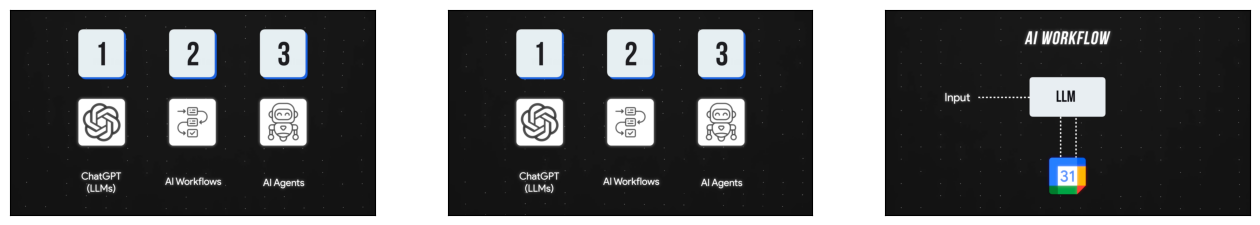

In [ ]:
plot_images(img)

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [ ]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4o", api_key=OPEN_API_TOKEN, max_new_tokens=1500)

In [ ]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "-----------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "-----------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [ ]:
context_str="".join(text)

In [ ]:
image_documents = SimpleDirectoryReader(input_files=img).load_data()

In [ ]:
query_str="Can you tell me what are AI agents?"

In [ ]:
import json
metadata_str = json.dumps(metadata_vid)

In [ ]:
result = openai_mm_llm.complete(
    prompt = qa_tmpl_str.format(
        query_str=query_str, metadata_str = metadata_str, context_str=context_str
    ),
    image_documents= image_documents
)

In [ ]:
result

CompletionResponse(text='AI agents are systems that can autonomously perform tasks without human intervention. Unlike AI workflows, which follow predefined paths set by humans, AI agents have the ability to make decisions and adapt to new information or situations. They can interact with various data sources and tools to achieve specific goals, acting independently to complete tasks.', additional_kwargs={}, raw=ChatCompletion(id='chatcmpl-BOKjTnhgRySFqvaYz1F1zvHYqmycE', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='AI agents are systems that can autonomously perform tasks without human intervention. Unlike AI workflows, which follow predefined paths set by humans, AI agents have the ability to make decisions and adapt to new information or situations. They can interact with various data sources and tools to achieve specific goals, acting independently to complete tasks.', refusal=None, role='assistant', annotations=[], audio=None, 

In [ ]:
pprint(result.text)

('AI agents are systems that can autonomously perform tasks without human '
 'intervention. Unlike AI workflows, which follow predefined paths set by '
 'humans, AI agents have the ability to make decisions and adapt to new '
 'information or situations. They can interact with various data sources and '
 'tools to achieve specific goals, acting independently to complete tasks.')


In [ ]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "-----------------------\n"
    "Metadata for video: {metadata_str} \n"

    "-----------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [ ]:
result = openai_mm_llm.complete(
    prompt = qa_tmpl_str.format(
        query_str=query_str, metadata_str = metadata_str
    ),
    image_documents= image_documents
)

In [ ]:
pprint(result.text)

('AI agents are systems that utilize artificial intelligence to perform tasks '
 'autonomously. They often integrate with large language models (LLMs) and AI '
 'workflows to process inputs and execute specific actions, such as scheduling '
 'or data management, without human intervention.')
